Three observable trends based on the data

 Since estimation has about 350 million and 500 million tweets  to be sent out per day .This numbers are correct. During processes to querying  the data ,Firstly I found that tweets sent non-top every second so everytime you get "Recent" tweets from every single News, completely different. Secondly based on current datas using plot out : 
 - Have alot tweets with negative sentiments than positive sentiments
 - NEWS organization like CNN,BBC have more tweets with negative sentiment than other
 
All conclusion is temporary and subject to change since tweets per minute,day is huge so we have to measure it by using data of each News organization by week,month or even year to conclude

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config1 import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
    
    
    
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews","@nytimes")

results_list = []
counter = 1

for target in target_terms:

    # Run search around each tweet
    public_tweets = api.search(target, count=100, result_type="recent")
    #print(len(public_tweets["statuses"]))
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
# List to hold results
        
        # Variables for holding sentiments
        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []
        text =[]
        date = []
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
          # Add each value to the appropriate list
        text.append(tweet["text"])
        date.append(tweet["created_at"])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
    # Store the Average Sentiments
        results_list.append({
            "Source Account": target, 
            "Text": text[0],
            "Date":date[0],
            "Compound": compound_list[0],
            "Positive": positive_list[0],
            "Neutral": negative_list[0],
            "Negative":neutral_list[0],
            "Tweets Ago": counter
        })
        counter=counter+1
        #Reset counter = 1 to count for another news
    counter=1
    

In [3]:
# Create a DataFrame using results_list and display
News_df = pd.DataFrame(results_list,columns = ['Source Account', 'Text', 'Date','Tweets Ago','Compound','Positive','Neutral','Negative'])
News_df.to_csv("News.csv")

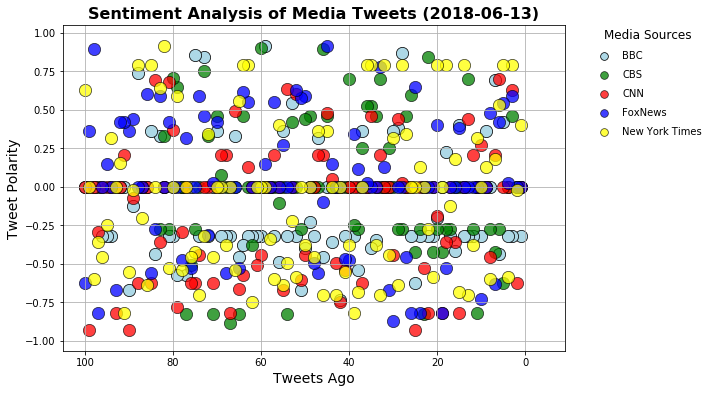

In [4]:
#Slice data for each type of News
BBC_data = News_df[News_df['Source Account']=='@BBC']
CBS_data = News_df[News_df['Source Account']=='@CBS']
CNN_data = News_df[News_df['Source Account']=='@CNN']
Fox_data = News_df[News_df['Source Account']=='@FoxNews']
NY_data = News_df[News_df['Source Account']=='@nytimes']
#Set parameter scatter plot parameter
plt.figure(figsize=(9,6))
#sORT data for Tweet age value(Most recent to recent)
BBC_data.sort_values(by=['Tweets Ago'])
CBS_data.sort_values(by=['Tweets Ago'])
CNN_data.sort_values(by=['Tweets Ago'])
Fox_data.sort_values(by=['Tweets Ago'])
NY_data.sort_values(by=['Tweets Ago'])

plt.scatter(BBC_data['Tweets Ago'],BBC_data['Compound'],s=150,alpha=1,c='lightblue',label='BBC',edgecolor='black',linewidths=0.75)
plt.scatter(CBS_data['Tweets Ago'], CBS_data['Compound'],s=150,alpha=0.75,c='green',label='CBS',edgecolor='black',linewidths=0.75)
plt.scatter(CNN_data['Tweets Ago'], CNN_data['Compound'],s=150,alpha=0.75,c='red',label='CNN',edgecolor='black',linewidths=0.75)
plt.scatter(Fox_data['Tweets Ago'], Fox_data['Compound'],s=150,alpha=0.75,c='blue',label='FoxNews',edgecolor='black',linewidths=0.75)
plt.scatter(NY_data['Tweets Ago'], NY_data['Compound'],s=150,alpha=0.75,c='Yellow',label='New York Times',edgecolor='black',linewidths=0.75)

now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.xlim(max(News_df['Tweets Ago'])+5, min(News_df['Tweets Ago']-10))
#plt.ylim(min(BBC_data['Compound'])-0.2, max(BBC_data['Compound']))
plt.title(f"Sentiment Analysis of Media Tweets ({now})", fontsize = 16, fontweight="bold")
plt.xlabel('Tweets Ago',fontsize = 14)
plt.ylabel('Tweet Polarity',fontsize = 14)

#Set legend title and size of points
fontsiz = plt.legend(frameon=False,labelspacing=0.9,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fontsiz.set_title("Media Sources", prop = {'size':12})
fontsiz.legendHandles[0]._sizes=[60]
fontsiz.legendHandles[1]._sizes=[60]
fontsiz.legendHandles[2]._sizes=[60]
fontsiz.legendHandles[3]._sizes=[60]
fontsiz.legendHandles[4]._sizes=[60]

plt.grid()
plt.savefig("sentimentanalysis.png")
plt.show()


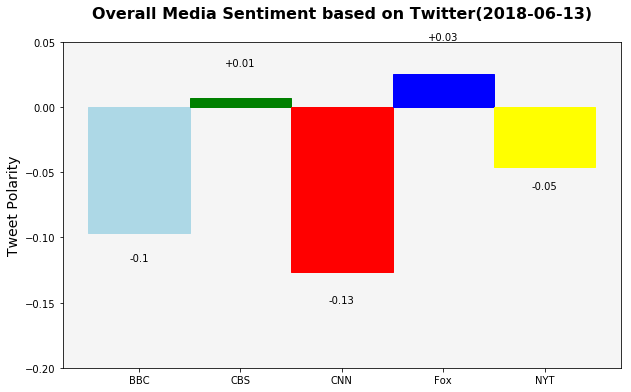

In [9]:


#fig, ax = plt.subplots()

#ax.bar(BBC_data['Source Account'].str.replace('@',''),np.mean(BBC_data['Compound']), align='edge',color ="lightblue")
#ax.bar(CBS_data['Source Account'].str.replace('@',''),np.mean(CBS_data['Compound']),color="green",align='edge')
#ax.bar(CNN_data['Source Account'].str.replace('@',''),np.mean(CNN_data['Compound']),color="red",align='edge')
#ax.bar(Fox_data['Source Account'].str.replace('@',''),np.mean(Fox_data['Compound']),color="blue",align='edge')
#ax.bar(NY_data['Source Account'].str.replace('@',''),np.mean(NY_data['Compound']),color="yellow",align='edge')

data = {'Name':['BBC','CBS','CNN','Fox','NYT'],'Overall':[np.mean(BBC_data['Compound']),np.mean(CBS_data['Compound']),np.mean(CNN_data['Compound']),np.mean(Fox_data['Compound']),np.mean(NY_data['Compound'])]}
check_df = pd.DataFrame(data)
ax = plt.figure(figsize=(10,6)).add_subplot(111)
#Set background color,size and space of bar charts
ax.patch.set_facecolor('whitesmoke')
ch = ax.bar(check_df['Name'],check_df['Overall'],width = 1)
#Set color of each bar
ch[0].set_color('lightblue')
ch[1].set_color('green')
ch[2].set_color('red')
ch[3].set_color('blue')
ch[4].set_color('yellow')
#Print out its value on each bar chart
for i in range(len(ch)):
        height = ch[i].get_height()
        value=  round(check_df['Overall'][i],2)
        if height<0:
            height = height-0.012
        elif height>0:
            height = height+0.02
            value = f"+{value}"
        ax.text(ch[i].get_x() + ch[i].get_width()/2, 1.1*height,value,
                ha='center', va='bottom')
ax.set_title(f"Overall Media Sentiment based on Twitter({now})\n", fontsize = 16,fontweight="bold")
ax.set_ylim(-0.2,0.05)
ax.set_ylabel('Tweet Polarity',fontsize = 14)
plt.savefig("overallsentiment.png")
plt.show()